# Funciones de distribuciones de probabilidades

## Distribucion Uniforme

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
a = 1
b = 100
n = 2000000
data = np.random.uniform(a,b,n)

(array([200069., 200017., 200083., 200664., 200466., 199654., 199370.,
        200312., 200397., 198968.]),
 array([ 1.00001122, 10.90000622, 20.80000122, 30.69999621, 40.59999121,
        50.4999862 , 60.3999812 , 70.2999762 , 80.19997119, 90.09996619,
        99.99996118]),
 <a list of 10 Patch objects>)

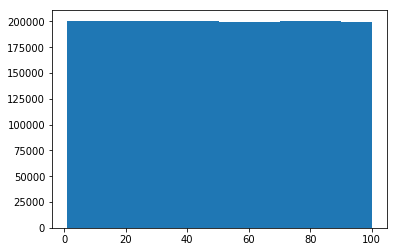

In [24]:
%matplotlib inline
plt.hist(data)

## Distribucion Normal

In [25]:
data = np.random.randn(100000)

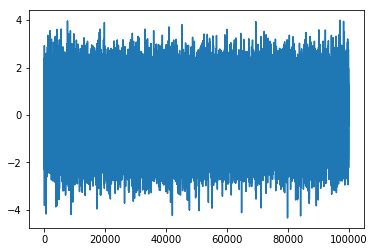

In [26]:
x = range(1,100001)
plt.plot(x, data)

(array([   33.,   353.,  2842., 12689., 27502., 31300., 18627.,  5690.,
          896.,    68.]),
 array([-4.33927415, -3.50583255, -2.67239095, -1.83894935, -1.00550775,
        -0.17206615,  0.66137545,  1.49481706,  2.32825866,  3.16170026,
         3.99514186]),
 <a list of 10 Patch objects>)

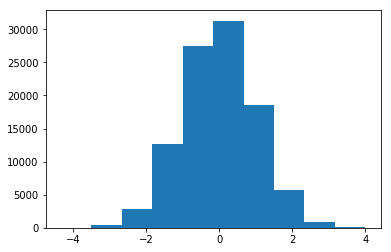

In [27]:
%matplotlib inline
plt.hist(data)

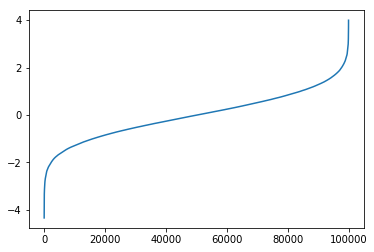

In [28]:
plt.plot(x, sorted(data))

(array([7.0000e+00, 1.9000e+02, 2.3810e+03, 1.2459e+04, 3.0932e+04,
        3.3522e+04, 1.6354e+04, 3.7630e+03, 3.7900e+02, 1.3000e+01]),
 array([-6.33296038, -4.01693651, -1.70091265,  0.61511122,  2.93113509,
         5.24715895,  7.56318282,  9.87920669, 12.19523056, 14.51125442,
        16.82727829]),
 <a list of 10 Patch objects>)

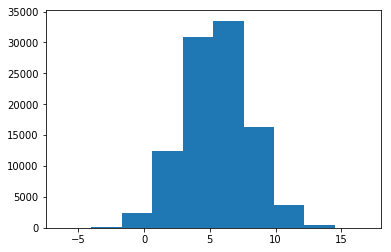

In [29]:
mu = 5.5
sd = 2.5
z = np.random.randn(100000)
data = mu +sd*z # z = (x - mu) / sd -> N(0,1) , x = mu + sd * z
plt.hist(data)

In [30]:
data = np.random.randn(2,4)
data

array([[-1.99580446,  1.18314097,  0.69474482,  1.2841607 ],
       [-1.58230811,  0.89649664, -2.39325787, -0.12415231]])

## La simulación de Monte Carlo

* Generamos dos numeros aleatorios x e y entre 0 y 1
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1 estamos dentro del circulo
    * Si es mayor de 1 estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos ente el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha probabilidad para aproximar el valor de pi
* Repetimos el experimento un numero suficiente de veces, para obtener diferentes aproximacions de pi

In [38]:
def pi_montecarlo(n,n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.142030000000001


(3.142030000000001, [<matplotlib.lines.Line2D at 0x7fd1bc0bdc88>])

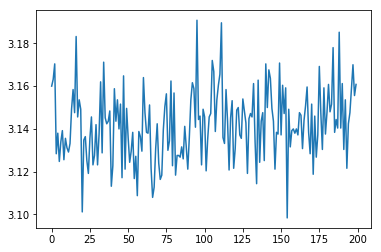

In [40]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [46]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5, 32, n)
    }
)

In [47]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000524,1.498874,18.502037
std,0.999686,2.498807,7.790470
min,-5.197345,-10.281573,5.000058
25%,-0.674633,-0.188634,11.755588
50%,-0.000777,1.498345,18.502832
75%,0.675387,3.183865,25.247181
max,4.927710,12.898903,31.999979


(array([1.60000e+01, 6.80000e+02, 1.45480e+04, 1.09928e+05, 3.21180e+05,
        3.63524e+05, 1.60599e+05, 2.76700e+04, 1.81600e+03, 3.90000e+01]),
 array([-5.19734466, -4.18483924, -3.17233382, -2.1598284 , -1.14732298,
        -0.13481756,  0.87768786,  1.89019328,  2.9026987 ,  3.91520412,
         4.92770954]),
 <a list of 10 Patch objects>)

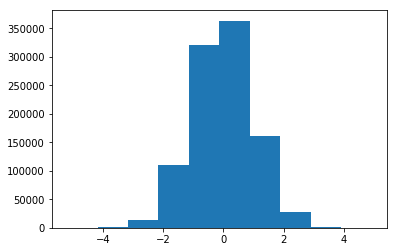

In [49]:
plt.hist(data["A"])

(array([7.10000e+01, 2.03200e+03, 2.42780e+04, 1.31469e+05, 3.12035e+05,
        3.32997e+05, 1.59305e+05, 3.44580e+04, 3.19900e+03, 1.56000e+02]),
 array([-10.28157335,  -7.96352575,  -5.64547815,  -3.32743055,
         -1.00938295,   1.30866465,   3.62671225,   5.94475985,
          8.26280745,  10.58085505,  12.89890264]),
 <a list of 10 Patch objects>)

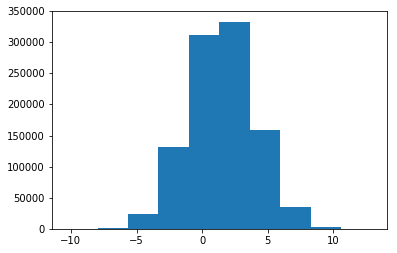

In [51]:
plt.hist(data["B"])

(array([ 99895.,  99847.,  99786.,  99866., 100498., 100126.,  99866.,
        100090., 100469.,  99557.]),
 array([ 5.00005765,  7.70004976, 10.40004188, 13.10003399, 15.8000261 ,
        18.50001821, 21.20001033, 23.90000244, 26.59999455, 29.29998667,
        31.99997878]),
 <a list of 10 Patch objects>)

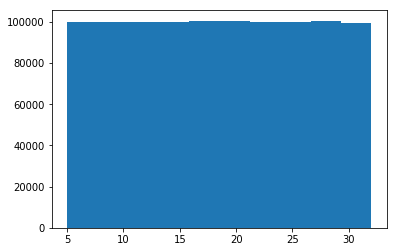

In [53]:
plt.hist(data["C"])

In [55]:
data  = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [57]:
columns_names = data.columns.values.tolist()

In [59]:
a = len(columns_names)
a

21

In [62]:
new_data = pd.DataFrame(
    {
        'Column Name': columns_names,
        'A' : np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }, index = range(42, 42+a)
 )
new_data.head()

,Column Name,A,B
42,State,-0.144441,0.061290
43,Account Length,0.642694,0.294744
44,Area Code,0.543591,0.343695
45,Phone,-2.085695,0.443429
46,Int'l Plan,0.577366,0.176038
